In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam

In [3]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0

In [10]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [16]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.6406 - accuracy: 0.8369 - val_loss: 0.3422 - val_accuracy: 0.9084
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3457 - accuracy: 0.9031 - val_loss: 0.2806 - val_accuracy: 0.9232
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2914 - accuracy: 0.9181 - val_loss: 0.2461 - val_accuracy: 0.9315
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2572 - accuracy: 0.9270 - val_loss: 0.2211 - val_accuracy: 0.9393
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2330 - accuracy: 0.9348 - val_loss: 0.2020 - val_accuracy: 0.9436
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2122 - accuracy: 0.9410 - val_loss: 0.1855 - val_accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1951 - accuracy: 0.9462 - val_loss: 0.1725 - val_ac

In [17]:
%load_ext tensorboard

In [18]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4500), started 14 days, 23:36:02 ago. (Use '!kill 4500' to kill it.)

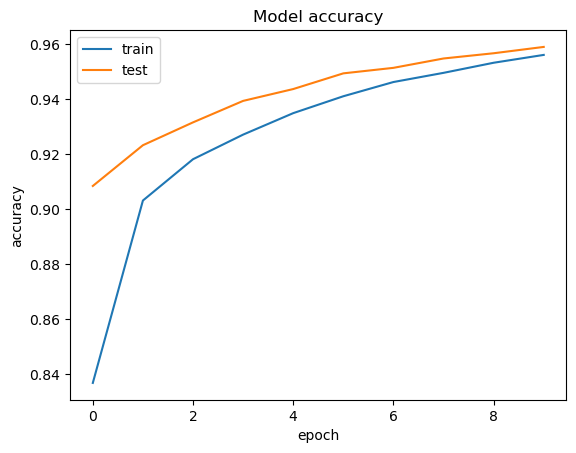

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()